In [101]:
import sklearn                 
import seaborn as sns           
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline

# 0. Описание задачи
Датасет содержит ряд признаков приложений с сервера Google Play. Целью является определить, платное приложение или нет.

# 1. Загрузка и обработка данных

In [102]:
data_raw = pd.read_csv("./googleplaystore.csv")

In [103]:
data_raw

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


1. App - название приложения
2. Category - категория приложения 
3. Rating - рейтинг приложения
4. Reviews - количество отзывов о приложении
5. Size - размер приложения
6. Installs - количество скачиваний приложения
7. Type - платное или бесплатное приложение
8. Price - цена приложения
9. Content Rating - возрастное ограничение
10. Genres - жанр приложения
11. Last Updated - последнее обновление
12. Current Ver - текущая версия приложения
13. Android Ver - версия Android OS, которую поддерживает приложение

In [104]:
data_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Выделим категориальные признаки

In [105]:
data_raw['Category'] = data_raw['Category'].astype('category')
data_raw['Category'] = data_raw['Category'].replace("1.9", np.nan , regex=True)
data_raw['Category'].dtype

CategoricalDtype(categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
                  'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
                  'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                  'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
                  'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
                  'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
                  'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
                  'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                  'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
, ordered=False)

In [106]:
data_raw['Type'] = data_raw['Type'].astype('category')
data_raw['Type'] = data_raw['Type'].replace("0", "Free" , regex=True)
data_raw['Type'].dtype

CategoricalDtype(categories=['Free', 'Paid'], ordered=False)

In [107]:
data_raw['Genres'] = data_raw['Genres'].astype('category')
data_raw['Genres'].dtype

CategoricalDtype(categories=['Action', 'Action;Action & Adventure', 'Adventure',
                  'Adventure;Action & Adventure', 'Adventure;Brain Games',
                  'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
                  'Arcade;Pretend Play', 'Art & Design',
                  ...
                  'Tools;Education', 'Travel & Local',
                  'Travel & Local;Action & Adventure', 'Trivia',
                  'Trivia;Education', 'Video Players & Editors',
                  'Video Players & Editors;Creativity',
                  'Video Players & Editors;Music & Video', 'Weather', 'Word'],
, ordered=False)

Обработаем остальные признаки

In [108]:
data_raw['Reviews'] = data_raw['Reviews'].replace("3.0M", 3000000 , regex=True)
data_raw['Reviews'] = data_raw['Reviews'].astype('float')
data_raw['Reviews'].dtype

dtype('float64')

In [109]:
data_raw['Size'] = data_raw['Size'].replace("Varies with device", np.nan , regex=True)
data_raw['Size'] = data_raw['Size'].str[:-1]
data_raw = data_raw.replace("1,", 1 , regex=True)
data_raw['Size'] = pd.to_numeric(data_raw['Size'])
data_raw['Size'].dtype

dtype('float64')

In [110]:
data_raw['Installs'] = data_raw['Installs'].replace("Free", np.nan , regex=True)
data_raw['Installs'] = data_raw['Installs'].apply(lambda v: float(str(v).replace("+","").replace(",","")))
data_raw['Installs'] = data_raw['Installs'].astype('float')
data_raw['Installs'].dtype

dtype('float64')

In [111]:
data_raw['Price'] = data_raw['Price'].replace("Everyone", 0, regex=True)
data_raw['Price'] = data_raw['Price'].apply(lambda v: float(str(v).replace("$","")))
data_raw['Price'].dtype

dtype('float64')

In [112]:
data_raw['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [113]:
data_raw['Content Rating'] = data_raw['Content Rating'].apply(lambda v: str(v).replace("Adults only 18+","18").replace("Mature 17+","18").replace("Teen","6").replace("Unrated","0").replace("Everyone","0").replace("0 10+", "10"))
data_raw['Content Rating'] = data_raw['Content Rating'].astype('float')
data_raw['Content Rating'].dtype

dtype('float64')

In [114]:
data_raw.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type              category
Price              float64
Content Rating     float64
Genres            category
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Избавимся от пропущенных значений

In [115]:
data_raw.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [116]:
data_na = data_raw.copy()
data_na.drop_duplicates(subset='App', inplace=True)
data_na.dropna(axis=0, how="all", subset=['Android Ver'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Category'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Current Ver'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Type'], inplace=True)

In [117]:
data_na.isna().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size              1226
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [118]:
del data_na['Android Ver']
del data_na['Current Ver']
del data_na['App']
del data_na['Last Updated']

Избавимся от выбросов

Text(0, 0.5, 'Rating')

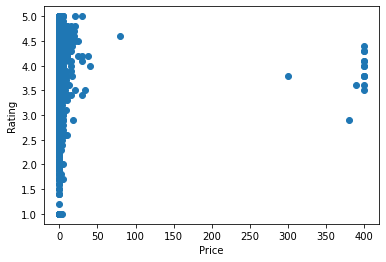

In [119]:
plt.scatter(data_na['Price'], data_na['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')

In [120]:
data_na['Price'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, 1])

0.05      0.00
0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50      0.00
0.70      0.00
0.90      0.00
0.95      1.99
1.00    400.00
Name: Price, dtype: float64

Text(0, 0.5, 'Rating')

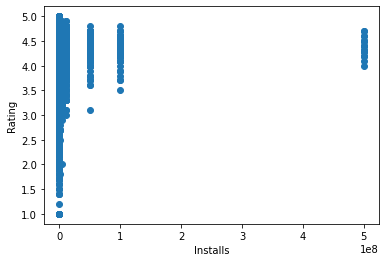

In [121]:
plt.scatter(data_na['Installs'], data_na['Rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')

In [122]:
data_na['Installs'].quantile([.005,.1,.2,.3,.4,.50,.70, .8, .90, .95, .96, .98, 1])

0.005            1.0
0.100            1.0
0.200            1.0
0.300           50.0
0.400          500.0
0.500        10000.0
0.700       100000.0
0.800      5000000.0
0.900     10000000.0
0.950     10000000.0
0.960     50000000.0
0.980    100000000.0
1.000    500000000.0
Name: Installs, dtype: float64

Text(0, 0.5, 'Size')

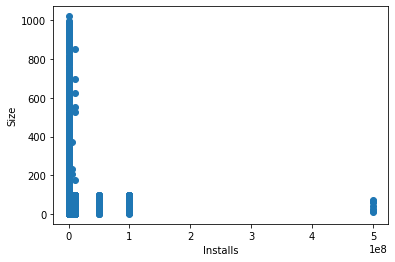

In [123]:
plt.scatter(data_na['Installs'], data_na['Size'])
plt.xlabel('Installs')
plt.ylabel('Size')

In [124]:
data_na['Size'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05       2.1
0.10       2.9
0.20       4.3
0.30       6.5
0.40       9.5
0.50      14.0
0.70      27.0
0.90      62.0
0.95      91.0
0.98     364.0
1.00    1020.0
Name: Size, dtype: float64

In [125]:
rows_to_drop = data_na[
    (data_na['Price'] > data_na['Price'].quantile(0.995)) | 
    (data_na['Size'] > data_na['Size'].quantile(0.995)) | 
    (data_na['Installs']  > data_na['Installs' ].quantile(0.95)) |
    (data_na['Installs'] == 0)].index
data_na = data_na.drop(rows_to_drop)
data_na.shape

(9132, 9)

Избавляемся от оставшихся пропущенных значений при помощи медианы

In [126]:
data_na.isna().sum()

Category             0
Rating            1416
Reviews              0
Size              1027
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [127]:
col = ["Rating", "Size"]
data_na.fillna(data_na[col].median(axis = 0), axis=0 , inplace=True)
data_na.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# 2. Обработка категориальных признаков

Удалим признак

In [128]:
data_na['Genres'].unique()

['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', ..., 'Role Playing;Brain Games', 'Strategy;Education', 'Racing;Pretend Play', 'Communication;Creativity', 'Strategy;Creativity']
Length: 118
Categories (120, object): ['Action', 'Action;Action & Adventure', 'Adventure', 'Adventure;Action & Adventure', ..., 'Video Players & Editors;Creativity', 'Video Players & Editors;Music & Video', 'Weather', 'Word']

In [129]:
del data_na['Genres']

Применим метод бинаризации

In [130]:
data_na['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [131]:
dummies = pd.get_dummies(data_na['Category'])


In [132]:
dummies.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
data_na = pd.concat((data_na, dummies), axis=1)
data_na = data_na.drop(['Category'], axis=1)

Заменим на числовой

In [134]:
data_na['Type'].unique()

['Free', 'Paid']
Categories (2, object): ['Free', 'Paid']

In [135]:
data_na['Type'] = pd.factorize(data_na['Type'])[0]

In [136]:
data_na.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159.0,19.0,10000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.0,500000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.7,5000000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.8,100000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,5.6,50000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Нормализация

In [137]:
data_na = (data_na - data_na.min(axis=0)) / (data_na.max(axis=0) - data_na.min(axis=0))

In [138]:
data_na.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,9132.000000,9.132000e+03,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,...,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000
mean,0.796356,1.184964e-03,0.033734,0.140198,0.075558,0.016001,0.094357,0.006680,0.009198,0.005804,...,0.039093,0.026172,0.037232,0.020696,0.024201,0.034275,0.084100,0.023106,0.015988,0.008213
std,0.126154,1.927887e-02,0.088280,0.315801,0.264305,0.073400,0.232804,0.081461,0.095472,0.075965,...,0.193828,0.159654,0.189339,0.142374,0.153680,0.181945,0.277553,0.150247,0.125435,0.090257
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,2.814800e-07,0.005691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.825000,9.615101e-06,0.013937,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.875000,2.716634e-04,0.030197,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Выбор тестовой и обучающей выборки

In [139]:
X = data_na.drop(["Type", "Price"], 1)
y = data_na["Type"]

print(X.shape)
print(y.shape)

(9132, 38)
(9132,)


C:\Users\D395~1\AppData\Local\Temp/ipykernel_25872/2402777868.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data_na.drop(["Type", "Price"], 1)


Разабьем данные на обучающую и тестовую выборки:

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(6118, 3014)

# 5. Подбор гиперпараметров

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Подбор количества нейронов в однослойной сети

In [142]:
n = 10
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in hidden_layer_size:
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                        solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Train: Min error=0.07502451781627983, number of neurons=178
Test: Min error=0.06934306569343066, number of neurons=94


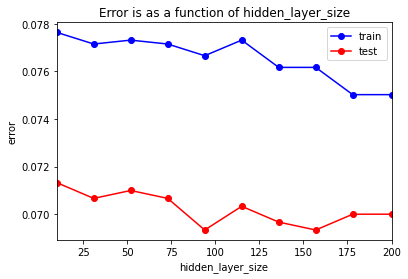

In [143]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: max accuracy=0.9249754821837202, number of neurons=178
Test: max accuracy=0.9306569343065694, number of neurons=94


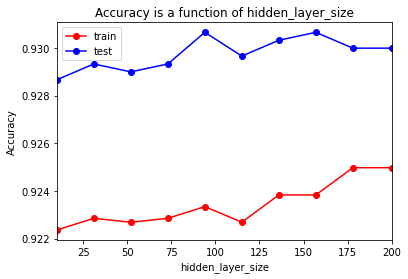

In [144]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Подбор количества нейронов в двуслойной сети

In [145]:
n = 10
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in enumerate(hidden_layer_size):
    for j, size_2 in enumerate(hidden_layer_size):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

Train: Min error=0.07044785877737823, number of neurons=178,94
Test: Min error=0.06867949568679496, number of neurons=94,31


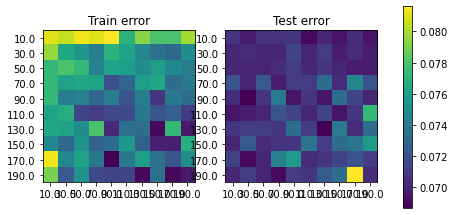

In [146]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err) // n],
        hidden_layer_size[np.argmin(train_err) % n]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err) // n],
        hidden_layer_size[np.argmin(test_err) % n]))

Train: Max accuracy=0.9295521412226218, number of neurons=178,94
Test: Max accuracy=0.931320504313205, number of neurons=94,31


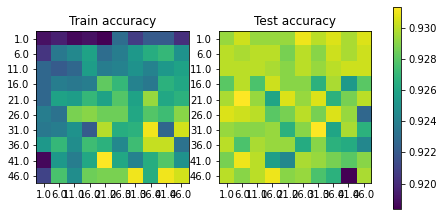

In [147]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc) // n],
        hidden_layer_size[np.argmax(train_acc) % n]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc) // n],
        hidden_layer_size[np.argmax(test_acc) % n]))

Подбор параметра регуляризации

In [151]:
alphas = np.logspace(-3, 2, 5)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in alphas:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (94,31), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

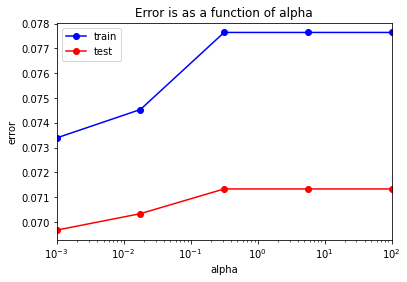

In [149]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

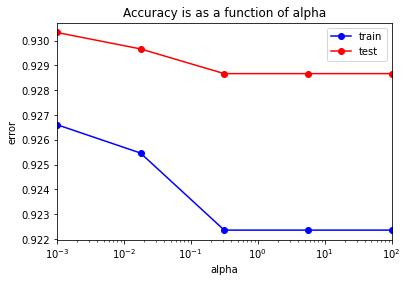

In [150]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

# 6. Выводы

Подбор числа нейронов в однослойной моделе

* За оптимальный размер скрытого слоя возьмем 94 нейронов. (accuracy=0.93)
* Переобучения и недоубочения не наблюдается

Подбор числа нейронов в двуслойной моделе

* За оптимальный размер скрытых слоев возьмем 94 и 131 нейронов. (accuracy=0.93)
* Можем заметить, что при добавление второго скрытого слоя точность не изменяется, следовательно для решения задачи будет достаточно однослойной сети
* Переобучения и недообучения не наблюдается

Подбор параметра регуляризации

* При выборе параметра регуляризации переобучения не наблюдается.
* При lambda > 10e-3 начинается рост ошибки и снижение accuracy. То есть с ростом lamda уменьшаются веса модели и стремятся к нулю.